## Python version

In [1]:
from platform import python_version
print(python_version())

3.6.5


## Import Libraries

In [2]:
import tensorflow as tf
print(tf.__version__)

2.2.0


In [3]:
tf.random.set_seed(1234)

In [4]:
import csv
import math
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import random
import statsmodels.api as sm
import statsmodels.formula.api as smf

from math import sqrt
from numpy.random import seed
seed(1)
from pandas import DataFrame
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from statsmodels.tsa.stattools import adfuller
from tensorflow.keras.layers import Dense
from tensorflow.keras import layers
from tensorflow.keras.layers import LSTM


dtypes = {
        'IsCanceled':                                    'float64',
        'LeadTime':                                          'float64',
        'StaysInWeekendNights':                                     'float64',
        'StaysInWeekNights':                                     'float64',
        'Adults':                            'float64',
        'Children':                            'float64',
        'Babies':                                  'float64',
        'Meal':                                    'category',
        'Country':                                               'category',
        'MarketSegment':                                    'category',
        'DistributionChannel':                                       'category',
        'IsRepeatedGuest':                               'float64',
        'PreviousCancellations':                                    'float64',
        'PreviousBookingsNotCanceled':                          'float64',
        'ReservedRoomType':                                             'category',
        'AssignedRoomType':                                            'category',
        'BookingChanges':                                                'float64',
        'DepositType':                                              'category',
        'Agent':                                              'category',
        'Company':                                 'category',
        'DaysInWaitingList':                                           'float64',
        'CustomerType':                                           'category',
        'ADR':                                          'float64',
        'RequiredCarParkingSpaces':                                      'float64',
        'TotalOfSpecialRequests':                                              'float64',
        'ReservationStatus':                                                'category'
        }

## Data Import and Manipulation

In [5]:
train_df = pd.read_csv("H1full.csv", dtype=dtypes, converters={'ArrivalDateWeekNumber': '{:0>2}'.format})

In [6]:
a=train_df.head()
b=train_df
b
c=b.sort_values(['ArrivalDateYear','ArrivalDateWeekNumber'], ascending=True)
c=pd.DataFrame(c)
c
type(c)

pandas.core.frame.DataFrame

In [7]:
from pandas import DataFrame  

df = DataFrame(c, columns= ['ArrivalDateYear', 'ArrivalDateWeekNumber']) 
df

,ArrivalDateYear,ArrivalDateWeekNumber
0,2015,27
1,2015,27
2,2015,27
3,2015,27
4,2015,27
...,...,...
40055,2017,35
40056,2017,35
40057,2017,35
40058,2017,35


In [8]:
# https://datatofish.com/concatenate-values-python/

df1 = df['ArrivalDateYear'].map(str) + df['ArrivalDateWeekNumber'].map(str)
print (df1)
df1=pd.DataFrame(df1)

0        201527
1        201527
2        201527
3        201527
4        201527
          ...  
40055    201735
40056    201735
40057    201735
40058    201735
40059    201735
Length: 40060, dtype: object


In [9]:
df2 = DataFrame(c, columns= ['ADR']) 
df2

,ADR
0,0.00
1,0.00
2,75.00
3,75.00
4,98.00
...,...
40055,89.75
40056,202.27
40057,153.57
40058,112.80


In [10]:
type(df1)

pandas.core.frame.DataFrame

In [11]:
df3=pd.concat([df1, df2], axis = 1)
df3
df3.columns = ['FullDate', 'ADR']

In [12]:
df3
df3.sort_values(['FullDate','ADR'], ascending=True)

,FullDate,ADR
0,201527,0.00
1,201527,0.00
125,201527,0.00
14463,201527,4.00
81,201527,55.68
...,...,...
13770,201735,328.00
13745,201735,341.00
39847,201735,344.67
39870,201735,351.00


In [13]:
df4 = df3.groupby('FullDate').agg("mean")
df4
df4.sort_values(['FullDate'], ascending=True)

,ADR
FullDate,
201527,100.099096
201528,110.399188
201529,128.112023
201530,140.592271
201531,145.563833
...,...
201731,208.712512
201732,211.528351
201733,211.162040


In [14]:
tseries=df4['ADR']
tseries

FullDate
201527    100.099096
201528    110.399188
201529    128.112023
201530    140.592271
201531    145.563833
             ...    
201731    208.712512
201732    211.528351
201733    211.162040
201734    210.284883
201735    186.204007
Name: ADR, Length: 115, dtype: float64

In [15]:
# https://www.statsmodels.org/stable/generated/statsmodels.stats.diagnostic.acorr_ljungbox.html
res = sm.tsa.ARMA(tseries, (1,1)).fit(disp=-1)
sm.stats.acorr_ljungbox(res.resid, lags=[10])

/home/michael/.local/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/home/michael/.local/lib/python3.6/site-packages/statsmodels/stats/diagnostic.py:524: FutureWarning: The value returned will change to a single DataFrame after 0.12 is released.  Set return_df to True to use to return a DataFrame now.  Set return_df to False to silence this warning.
  warnings.warn(msg, FutureWarning)


(array([5.97004401]), array([0.8177737]))

In [16]:
result = adfuller(tseries)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -1.226203
p-value: 0.662224
Critical Values:
	1%: -3.489
	5%: -2.887
	10%: -2.580


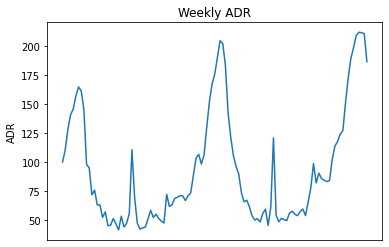

In [17]:
plt.plot(tseries)
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off
plt.ylabel('ADR')
plt.title("Weekly ADR")
plt.show()

In [18]:
df=pd.DataFrame(tseries)
df

,ADR
FullDate,
201527,100.099096
201528,110.399188
201529,128.112023
201530,140.592271
201531,145.563833
...,...
201731,208.712512
201732,211.528351
201733,211.162040


In [19]:
df.to_csv("weekly adr h1.csv", sep='\t', encoding='utf-8')

In [20]:
df = df[:100]

In [21]:
df

,ADR
FullDate,
201527,100.099096
201528,110.399188
201529,128.112023
201530,140.592271
201531,145.563833
...,...
201716,82.126727
201717,90.483817
201718,85.819405


### Form dataset matrix

In [22]:
def create_dataset(df, previous=1):
    dataX, dataY = [], []
    for i in range(len(df)-previous-1):
        a = df[i:(i+previous), 0]
        dataX.append(a)
        dataY.append(df[i + previous, 0])
    return np.array(dataX), np.array(dataY)

In [23]:
df

,ADR
FullDate,
201527,100.099096
201528,110.399188
201529,128.112023
201530,140.592271
201531,145.563833
...,...
201716,82.126727
201717,90.483817
201718,85.819405


## Normalize dataset with MinMaxScaler

In [24]:
scaler = MinMaxScaler(feature_range=(0, 1))
df = scaler.fit_transform(df)
df

array([[0.35915778],
       [0.42256282],
       [0.53159902],
       [0.6084246 ],
       [0.63902841],
       [0.70858066],
       [0.75574219],
       [0.7348692 ],
       [0.63555916],
       [0.34629856],
       [0.32723163],
       [0.18514608],
       [0.21056117],
       [0.13243974],
       [0.1321469 ],
       [0.06636683],
       [0.09516089],
       [0.02223529],
       [0.02497857],
       [0.06036494],
       [0.03174555],
       [0.        ],
       [0.07264622],
       [0.01577971],
       [0.03508942],
       [0.08660442],
       [0.42389599],
       [0.17160055],
       [0.03557547],
       [0.00426488],
       [0.0107102 ],
       [0.01544127],
       [0.05726066],
       [0.10383914],
       [0.06606771],
       [0.08345677],
       [0.06042365],
       [0.04667078],
       [0.03650144],
       [0.18829055],
       [0.12438214],
       [0.13248013],
       [0.16620484],
       [0.17270111],
       [0.18086367],
       [0.18034879],
       [0.15518062],
       [0.180

## Configure LSTM model

In [25]:
# Training and Validation data partition
train_size = int(len(df) * 0.8)
val_size = len(df) - train_size
train, val = df[0:train_size,:], df[train_size:len(df),:]

# Number of previous
previous = 5
X_train, Y_train = create_dataset(train, previous)
X_val, Y_val = create_dataset(val, previous)

In [26]:
X_train

array([[0.35915778, 0.42256282, 0.53159902, 0.6084246 , 0.63902841],
       [0.42256282, 0.53159902, 0.6084246 , 0.63902841, 0.70858066],
       [0.53159902, 0.6084246 , 0.63902841, 0.70858066, 0.75574219],
       [0.6084246 , 0.63902841, 0.70858066, 0.75574219, 0.7348692 ],
       [0.63902841, 0.70858066, 0.75574219, 0.7348692 , 0.63555916],
       [0.70858066, 0.75574219, 0.7348692 , 0.63555916, 0.34629856],
       [0.75574219, 0.7348692 , 0.63555916, 0.34629856, 0.32723163],
       [0.7348692 , 0.63555916, 0.34629856, 0.32723163, 0.18514608],
       [0.63555916, 0.34629856, 0.32723163, 0.18514608, 0.21056117],
       [0.34629856, 0.32723163, 0.18514608, 0.21056117, 0.13243974],
       [0.32723163, 0.18514608, 0.21056117, 0.13243974, 0.1321469 ],
       [0.18514608, 0.21056117, 0.13243974, 0.1321469 , 0.06636683],
       [0.21056117, 0.13243974, 0.1321469 , 0.06636683, 0.09516089],
       [0.13243974, 0.1321469 , 0.06636683, 0.09516089, 0.02223529],
       [0.1321469 , 0.06636683, 0.

In [27]:
Y_train

array([0.70858066, 0.75574219, 0.7348692 , 0.63555916, 0.34629856,
       0.32723163, 0.18514608, 0.21056117, 0.13243974, 0.1321469 ,
       0.06636683, 0.09516089, 0.02223529, 0.02497857, 0.06036494,
       0.03174555, 0.        , 0.07264622, 0.01577971, 0.03508942,
       0.08660442, 0.42389599, 0.17160055, 0.03557547, 0.00426488,
       0.0107102 , 0.01544127, 0.05726066, 0.10383914, 0.06606771,
       0.08345677, 0.06042365, 0.04667078, 0.03650144, 0.18829055,
       0.12438214, 0.13248013, 0.16620484, 0.17270111, 0.18086367,
       0.18034879, 0.15518062, 0.18007011, 0.19510582, 0.28795589,
       0.37879187, 0.40002117, 0.34828686, 0.3957591 , 0.54170226,
       0.67690781, 0.77128436, 0.82316665, 0.91084475, 1.        ,
       0.9860843 , 0.87005436, 0.61914988, 0.49061203, 0.39187411,
       0.33595669, 0.29452088, 0.19646456, 0.14820618, 0.15726342,
       0.12222412, 0.07324677, 0.05206859, 0.05937164, 0.04205497,
       0.0867528 , 0.10976084, 0.0236608 , 0.11987636])

Epoch 1/100
59/59 - 1s - loss: 0.0675 - val_loss: 0.0030
Epoch 2/100
59/59 - 0s - loss: 0.0412 - val_loss: 0.0121
Epoch 3/100
59/59 - 0s - loss: 0.0320 - val_loss: 0.0222
Epoch 4/100
59/59 - 0s - loss: 0.0290 - val_loss: 0.0270
Epoch 5/100
59/59 - 0s - loss: 0.0273 - val_loss: 0.0261
Epoch 6/100
59/59 - 0s - loss: 0.0260 - val_loss: 0.0257
Epoch 7/100
59/59 - 0s - loss: 0.0248 - val_loss: 0.0252
Epoch 8/100
59/59 - 0s - loss: 0.0238 - val_loss: 0.0270
Epoch 9/100
59/59 - 0s - loss: 0.0232 - val_loss: 0.0257
Epoch 10/100
59/59 - 0s - loss: 0.0223 - val_loss: 0.0221
Epoch 11/100
59/59 - 0s - loss: 0.0217 - val_loss: 0.0212
Epoch 12/100
59/59 - 0s - loss: 0.0212 - val_loss: 0.0218
Epoch 13/100
59/59 - 0s - loss: 0.0208 - val_loss: 0.0206
Epoch 14/100
59/59 - 0s - loss: 0.0195 - val_loss: 0.0193
Epoch 15/100
59/59 - 0s - loss: 0.0192 - val_loss: 0.0170
Epoch 16/100
59/59 - 0s - loss: 0.0189 - val_loss: 0.0152
Epoch 17/100
59/59 - 0s - loss: 0.0178 - val_loss: 0.0161
Epoch 18/100
59/59 - 0s

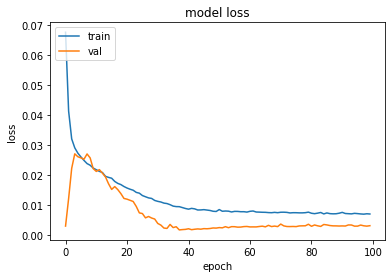

In [28]:
# reshape input to be [samples, time steps, features]
X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_val = np.reshape(X_val, (X_val.shape[0], 1, X_val.shape[1]))

# Generate LSTM network
model = tf.keras.Sequential()
model.add(LSTM(4, input_shape=(1, previous)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
history=model.fit(X_train, Y_train, validation_split=0.2, epochs=100, batch_size=1, verbose=2)


# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [29]:
# Generate predictions
trainpred = model.predict(X_train)
valpred = model.predict(X_val)

In [30]:
trainpred

array([[0.6768276 ],
       [0.7283366 ],
       [0.7558924 ],
       [0.70726144],
       [0.575852  ],
       [0.26408112],
       [0.2292373 ],
       [0.14303198],
       [0.16624218],
       [0.1502012 ],
       [0.1306953 ],
       [0.09542358],
       [0.10341621],
       [0.05351183],
       [0.0404336 ],
       [0.08051829],
       [0.04557893],
       [0.02292243],
       [0.08572666],
       [0.03779862],
       [0.04482689],
       [0.10364738],
       [0.39966965],
       [0.20421243],
       [0.04880127],
       [0.06666274],
       [0.02011591],
       [0.02717945],
       [0.06340496],
       [0.10786119],
       [0.08027521],
       [0.09886094],
       [0.08586712],
       [0.06300423],
       [0.05980276],
       [0.18396556],
       [0.13948318],
       [0.13860652],
       [0.1962947 ],
       [0.18162468],
       [0.19564493],
       [0.19950262],
       [0.17306818],
       [0.19455765],
       [0.21114898],
       [0.29758835],
       [0.4040677 ],
       [0.431

In [31]:
valpred

array([[0.06345657],
       [0.10157923],
       [0.1104654 ],
       [0.09716712],
       [0.09570698],
       [0.11242811],
       [0.12317267],
       [0.09345171],
       [0.15776476],
       [0.23407608],
       [0.35783952],
       [0.28174675],
       [0.31671184],
       [0.30291247]], dtype=float32)

In [32]:
# Convert predictions back to normal values
trainpred = scaler.inverse_transform(trainpred)
Y_train = scaler.inverse_transform([Y_train])
valpred = scaler.inverse_transform(valpred)
Y_val = scaler.inverse_transform([Y_val])
predictions = valpred

In [33]:
Y_train.shape

(1, 74)

In [34]:
Y_val.shape

(1, 14)

In [35]:
X_train.shape

(74, 1, 5)

In [36]:
X_val.shape

(14, 1, 5)

In [37]:
Y_train

array([[156.86253472, 164.52388406, 161.13308442, 145.00025559,
         98.01012626,  94.91272152,  71.83104911,  75.9597076 ,
         63.26895062,  63.22137856,  52.53546326,  57.21303342,
         45.36633466,  45.81197761,  51.56046154,  46.91126722,
         41.75423077,  53.55554455,  44.31763006,  47.45447674,
         55.82304196, 110.61576087,  69.63058824,  47.53343434,
         42.44705607,  43.49409326,  44.26265193,  51.0561747 ,
         58.62280778,  52.48687259,  55.3117096 ,  51.57      ,
         49.33585714,  47.68385787,  72.34186517,  61.96      ,
         63.27551163,  68.75405995,  69.8093736 ,  71.13537391,
         71.05173333,  66.96318584,  71.00646186,  73.449     ,
         88.53241117, 103.28863636, 106.73731778,  98.333125  ,
        106.04494737, 129.7532852 , 151.71730887, 167.04869565,
        175.47692771, 189.72015873, 204.20334975, 201.94275689,
        183.09379501, 142.33458333, 121.4537224 , 105.41383436,
         96.33009852,  89.59888889,  73.

In [38]:
Y_val

array([[56.18551429, 57.79941043, 55.27926087, 53.95722826, 57.43459459,
        59.7281459 , 54.04828244, 65.76393443, 78.04821622, 98.80672269,
        82.1267268 , 90.48381679, 85.81940503, 84.46819121]])

In [39]:
X_train

array([[[0.35915778, 0.42256282, 0.53159902, 0.6084246 , 0.63902841]],

       [[0.42256282, 0.53159902, 0.6084246 , 0.63902841, 0.70858066]],

       [[0.53159902, 0.6084246 , 0.63902841, 0.70858066, 0.75574219]],

       [[0.6084246 , 0.63902841, 0.70858066, 0.75574219, 0.7348692 ]],

       [[0.63902841, 0.70858066, 0.75574219, 0.7348692 , 0.63555916]],

       [[0.70858066, 0.75574219, 0.7348692 , 0.63555916, 0.34629856]],

       [[0.75574219, 0.7348692 , 0.63555916, 0.34629856, 0.32723163]],

       [[0.7348692 , 0.63555916, 0.34629856, 0.32723163, 0.18514608]],

       [[0.63555916, 0.34629856, 0.32723163, 0.18514608, 0.21056117]],

       [[0.34629856, 0.32723163, 0.18514608, 0.21056117, 0.13243974]],

       [[0.32723163, 0.18514608, 0.21056117, 0.13243974, 0.1321469 ]],

       [[0.18514608, 0.21056117, 0.13243974, 0.1321469 , 0.06636683]],

       [[0.21056117, 0.13243974, 0.1321469 , 0.06636683, 0.09516089]],

       [[0.13243974, 0.1321469 , 0.06636683, 0.09516089, 0.02223

In [40]:
X_val

array([[[0.07755818, 0.0428816 , 0.0612328 , 0.05401089, 0.04941732]],

       [[0.0428816 , 0.0612328 , 0.05401089, 0.04941732, 0.08883571]],

       [[0.0612328 , 0.05401089, 0.04941732, 0.08883571, 0.09877049]],

       [[0.05401089, 0.04941732, 0.08883571, 0.09877049, 0.08325702]],

       [[0.04941732, 0.08883571, 0.09877049, 0.08325702, 0.07511889]],

       [[0.08883571, 0.09877049, 0.08325702, 0.07511889, 0.09652477]],

       [[0.09877049, 0.08325702, 0.07511889, 0.09652477, 0.11064335]],

       [[0.08325702, 0.07511889, 0.09652477, 0.11064335, 0.0756794 ]],

       [[0.07511889, 0.09652477, 0.11064335, 0.0756794 , 0.1477983 ]],

       [[0.09652477, 0.11064335, 0.0756794 , 0.1477983 , 0.22341756]],

       [[0.11064335, 0.0756794 , 0.1477983 , 0.22341756, 0.35120222]],

       [[0.0756794 , 0.1477983 , 0.22341756, 0.35120222, 0.24852395]],

       [[0.1477983 , 0.22341756, 0.35120222, 0.24852395, 0.2999683 ]],

       [[0.22341756, 0.35120222, 0.24852395, 0.2999683 , 0.27125

In [41]:
# calculate RMSE
trainScore = math.sqrt(mean_squared_error(Y_train[0], trainpred[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
valScore = math.sqrt(mean_squared_error(Y_val[0], valpred[:,0]))
print('Validation Score: %.2f RMSE' % (valScore))

Train Score: 12.59 RMSE
Validation Score: 8.80 RMSE


In [42]:
# Train predictions
trainpredPlot = np.empty_like(df)
trainpredPlot[:, :] = np.nan
trainpredPlot[previous:len(trainpred)+previous, :] = trainpred

In [43]:
# Validation predictions
valpredPlot = np.empty_like(df)
valpredPlot[:, :] = np.nan
valpredPlot[len(trainpred)+(previous*2)+1:len(df)-1, :] = valpred

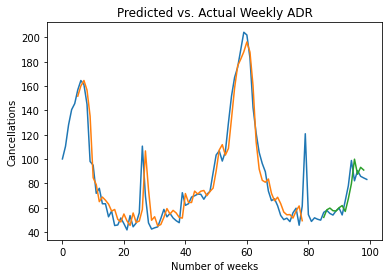

In [44]:
# Plot all predictions
inversetransform, =plt.plot(scaler.inverse_transform(df))
trainpred, =plt.plot(trainpredPlot)
valpred, =plt.plot(valpredPlot)
plt.xlabel('Number of weeks')
plt.ylabel('Cancellations')
plt.title("Predicted vs. Actual Weekly ADR")
plt.show()

In [45]:
Y_val=Y_val.reshape(-1)
Y_val.shape
Y_val=pd.Series(Y_val)

In [46]:
Y_val

0     56.185514
1     57.799410
2     55.279261
3     53.957228
4     57.434595
5     59.728146
6     54.048282
7     65.763934
8     78.048216
9     98.806723
10    82.126727
11    90.483817
12    85.819405
13    84.468191
dtype: float64

In [47]:
np.mean(Y_val)

69.99638928280858

In [48]:
predictions=predictions.reshape(-1)
predictions.shape
predictions=pd.Series(predictions)

In [49]:
predictions

0     52.062695
1     58.255684
2     59.699238
3     57.538940
4     57.301743
5     60.018078
6     61.763523
7     56.935379
8     67.382980
9     79.779686
10    99.884949
11    87.523743
12    93.203789
13    90.962097
dtype: float32

In [50]:
import numpy as np

def mda(actual: np.ndarray, predicted: np.ndarray):
    """ Mean Directional Accuracy """
    return np.mean((np.sign(actual[1:] - actual[:-1]) == np.sign(predicted[1:] - predicted[:-1])).astype(int))

In [51]:
mda(Y_val, predictions)

0.8571428571428571

In [52]:
# https://machinelearningmastery.com/time-series-forecasting-performance-measures-with-python/

mse = mean_squared_error(Y_val, predictions)
rmse = sqrt(mse)
print('RMSE: %f' % rmse)

RMSE: 8.798265


In [53]:
forecast_error = (predictions-Y_val)
forecast_error

0     -4.122820
1      0.456273
2      4.419977
3      3.581712
4     -0.132852
5      0.289932
6      7.715241
7     -8.828555
8    -10.665236
9    -19.027037
10    17.758222
11    -2.960074
12     7.384384
13     6.493906
dtype: float64

In [54]:
mean_forecast_error = np.mean(forecast_error)
mean_forecast_error

0.16879092349024002

In [55]:
X_train

array([[[0.35915778, 0.42256282, 0.53159902, 0.6084246 , 0.63902841]],

       [[0.42256282, 0.53159902, 0.6084246 , 0.63902841, 0.70858066]],

       [[0.53159902, 0.6084246 , 0.63902841, 0.70858066, 0.75574219]],

       [[0.6084246 , 0.63902841, 0.70858066, 0.75574219, 0.7348692 ]],

       [[0.63902841, 0.70858066, 0.75574219, 0.7348692 , 0.63555916]],

       [[0.70858066, 0.75574219, 0.7348692 , 0.63555916, 0.34629856]],

       [[0.75574219, 0.7348692 , 0.63555916, 0.34629856, 0.32723163]],

       [[0.7348692 , 0.63555916, 0.34629856, 0.32723163, 0.18514608]],

       [[0.63555916, 0.34629856, 0.32723163, 0.18514608, 0.21056117]],

       [[0.34629856, 0.32723163, 0.18514608, 0.21056117, 0.13243974]],

       [[0.32723163, 0.18514608, 0.21056117, 0.13243974, 0.1321469 ]],

       [[0.18514608, 0.21056117, 0.13243974, 0.1321469 , 0.06636683]],

       [[0.21056117, 0.13243974, 0.1321469 , 0.06636683, 0.09516089]],

       [[0.13243974, 0.1321469 , 0.06636683, 0.09516089, 0.02223

In [56]:
X_train.shape

(74, 1, 5)

## Validate Predictions on Test Data

In [57]:
Xnew = np.array([tseries.iloc[95:100],tseries.iloc[96:101],tseries.iloc[97:102],tseries.iloc[98:103],tseries.iloc[99:104],tseries.iloc[100:105],tseries.iloc[101:106],tseries.iloc[102:107],tseries.iloc[103:108],tseries.iloc[104:109],tseries.iloc[105:110],tseries.iloc[106:111],tseries.iloc[107:112],tseries.iloc[108:113],tseries.iloc[109:114]])

In [58]:
Xnew

array([[ 82.1267268 ,  90.48381679,  85.81940503,  84.46819121,
         83.25621451],
       [ 90.48381679,  85.81940503,  84.46819121,  83.25621451,
         84.12304147],
       [ 85.81940503,  84.46819121,  83.25621451,  84.12304147,
        102.08452794],
       [ 84.46819121,  83.25621451,  84.12304147, 102.08452794,
        113.74824022],
       [ 83.25621451,  84.12304147, 102.08452794, 113.74824022,
        117.55218509],
       [ 84.12304147, 102.08452794, 113.74824022, 117.55218509,
        124.05833795],
       [102.08452794, 113.74824022, 117.55218509, 124.05833795,
        127.02865337],
       [113.74824022, 117.55218509, 124.05833795, 127.02865337,
        151.23568966],
       [117.55218509, 124.05833795, 127.02865337, 151.23568966,
        172.26865909],
       [124.05833795, 127.02865337, 151.23568966, 172.26865909,
        189.16831978],
       [127.02865337, 151.23568966, 172.26865909, 189.16831978,
        198.22268542],
       [151.23568966, 172.26865909, 189.168

In [59]:
Xnew = scaler.fit_transform(Xnew)
Xnew
Xnewformat = np.reshape(Xnew, (Xnew.shape[0], 1, Xnew.shape[1]))
ynew=model.predict(Xnewformat)

In [60]:
Xnew.shape

(15, 5)

In [61]:
ynew

array([[0.02911448],
       [0.02332726],
       [0.13809595],
       [0.22962333],
       [0.2725696 ],
       [0.34899533],
       [0.3710577 ],
       [0.556644  ],
       [0.7516146 ],
       [0.8891489 ],
       [0.9482267 ],
       [0.9543825 ],
       [0.9082619 ],
       [0.8376899 ],
       [0.78826576]], dtype=float32)

In [62]:
type(ynew)

numpy.ndarray

In [63]:
ynew.shape

(15, 1)

In [64]:
actual = tseries.iloc[100:115]
actual

FullDate
201721     84.123041
201722    102.084528
201723    113.748240
201724    117.552185
201725    124.058338
201726    127.028653
201727    151.235690
201728    172.268659
201729    189.168320
201730    198.222685
201731    208.712512
201732    211.528351
201733    211.162040
201734    210.284883
201735    186.204007
Name: ADR, dtype: float64

In [65]:
actual = np.array(actual)
actual

array([ 84.12304147, 102.08452794, 113.74824022, 117.55218509,
       124.05833795, 127.02865337, 151.23568966, 172.26865909,
       189.16831978, 198.22268542, 208.71251185, 211.52835052,
       211.16204036, 210.28488251, 186.20400722])

In [66]:
actual=actual.reshape(15,-1)
actual.shape

(15, 1)

In [67]:
actual

array([[ 84.12304147],
       [102.08452794],
       [113.74824022],
       [117.55218509],
       [124.05833795],
       [127.02865337],
       [151.23568966],
       [172.26865909],
       [189.16831978],
       [198.22268542],
       [208.71251185],
       [211.52835052],
       [211.16204036],
       [210.28488251],
       [186.20400722]])

In [68]:
ynew=ynew.reshape(-1)
actual=actual.reshape(-1)
actualpd=pd.Series(actual)

In [69]:
np.min(df)

0.0

In [70]:
ynew

array([0.02911448, 0.02332726, 0.13809595, 0.22962333, 0.2725696 ,
       0.34899533, 0.3710577 , 0.556644  , 0.7516146 , 0.8891489 ,
       0.9482267 , 0.9543825 , 0.9082619 , 0.8376899 , 0.78826576],
      dtype=float32)

In [71]:
maxt=np.max(tseries)

In [72]:
mint=np.min(tseries)

In [73]:
ynew = ynew * np.abs(maxt-mint) + np.min(tseries)
ynewpd=pd.Series(ynew)

In [74]:
actualpd

0      84.123041
1     102.084528
2     113.748240
3     117.552185
4     124.058338
5     127.028653
6     151.235690
7     172.268659
8     189.168320
9     198.222685
10    208.712512
11    211.528351
12    211.162040
13    210.284883
14    186.204007
dtype: float64

In [75]:
ynewpd

0      46.697117
1      45.714596
2      65.199348
3      80.738327
4      88.029495
5     101.004608
6     104.750229
7     136.257980
8     169.358932
9     192.708694
10    202.738586
11    203.783676
12    195.953598
13    183.972290
14    175.581360
dtype: float32

In [76]:
mda(actualpd, ynewpd)

0.8666666666666667

In [77]:
mse = mean_squared_error(actualpd, ynewpd)
rmse = sqrt(mse)
print('RMSE: %f' % rmse)

RMSE: 31.914984


In [78]:
forecast_error = (ynewpd-actualpd)
forecast_error

0    -37.425925
1    -56.369932
2    -48.548892
3    -36.813858
4    -36.028843
5    -26.024045
6    -46.485461
7    -36.010679
8    -19.809387
9     -5.513991
10    -5.973925
11    -7.744674
12   -15.208442
13   -26.312592
14   -10.622647
dtype: float64

In [79]:
mean_forecast_error = np.mean(forecast_error)
mean_forecast_error

-27.659552949861602

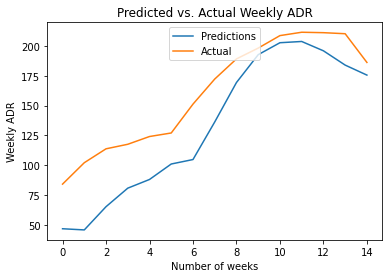

In [80]:
predictons, =plt.plot(ynewpd, label='Predictions')
actual, =plt.plot(actualpd, label='Actual')
plt.xlabel('Number of weeks')
plt.ylabel('Weekly ADR')
plt.title("Predicted vs. Actual Weekly ADR")
plt.legend(loc = 'upper center')
plt.show()

In [81]:
np.mean(actualpd)

160.492142162915